In [1]:
import sys


sys.path.append("../src/")

In [18]:
from sennet.core.mmap_arrays import read_mmap_array
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mmap1 = read_mmap_array("/home/clay/research/kaggle/sennet/data_dumps/processed/kidney_1_dense/image/")
mmap2 = read_mmap_array("/home/clay/research/kaggle/sennet/data_dumps/processed/kidney_2/image/")
mmap3 = read_mmap_array("/home/clay/research/kaggle/sennet/data_dumps/processed/kidney_3_sparse/image/")

In [28]:
def plot_percentile(mmap, p):
    percentiles = np.percentile(mmap.data.reshape((mmap.shape[0], -1)), [p, 100-p], axis=1)
    n_channels = mmap.data.shape[0]
    channel_margin = 0.2
    channel_lb = int(channel_margin * n_channels)
    channel_ub = int((1-channel_margin) * n_channels)
    lb, ub = global_percentile = np.percentile(mmap.data[channel_lb: channel_ub, :], [p, 100-p])
    plt.plot(percentiles[0, :], label="lb")
    plt.plot(percentiles[1, :], label="ub")
    plt.axhline(lb)
    plt.axhline(ub)
    plt.legend()

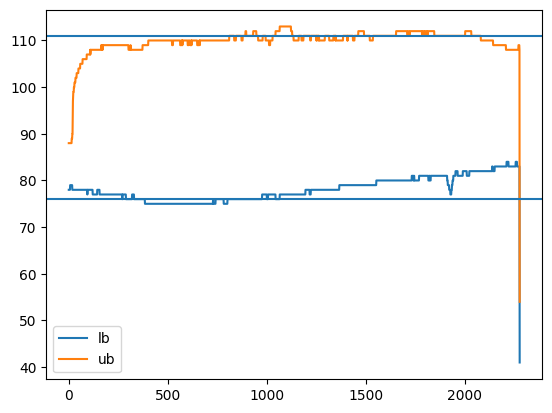

In [32]:
plot_percentile(mmap1, 1)

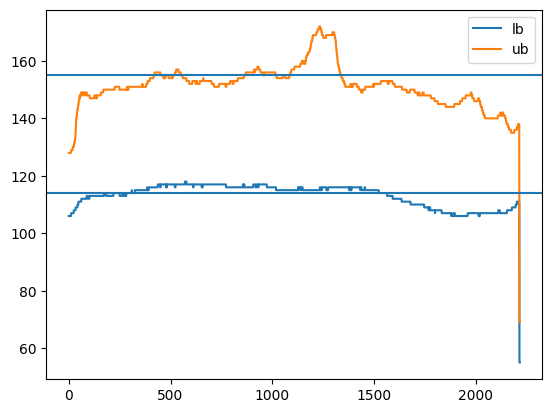

In [33]:
plot_percentile(mmap2, 1)

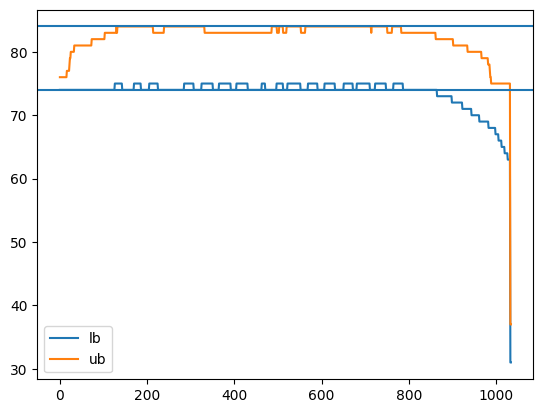

In [34]:
plot_percentile(mmap3, 1)